In [5]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

We'll continue to make use of the fuel economy dataset in this workspace.

In [7]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [8]:
fuel_econ.make.value_counts()

BMW                  523
Mercedes-Benz        269
Porsche              235
Ford                 218
Chevrolet            212
MINI                 201
Audi                 201
Volkswagen           174
Hyundai              158
Dodge                140
Lexus                125
Kia                  124
Cadillac             118
Toyota               116
Infiniti             108
Honda                101
Jaguar                98
Mazda                 87
Nissan                71
Buick                 66
Subaru                60
Chrysler              58
Lincoln               52
Volvo                 50
Acura                 46
Bentley               45
Mitsubishi            44
Rolls-Royce           42
Maserati              39
Scion                 27
Fiat                  26
Ferrari               23
Genesis               17
Aston Martin          15
Suzuki                13
Roush Performance     10
Lotus                 10
Alfa Romeo             6
Karma                  1
Name: make, dtype: int64

In [9]:
list(fuel_econ['make'].value_counts().loc[lambda x : x>80].index)

['BMW',
 'Mercedes-Benz',
 'Porsche',
 'Ford',
 'Chevrolet',
 'MINI',
 'Audi',
 'Volkswagen',
 'Hyundai',
 'Dodge',
 'Lexus',
 'Kia',
 'Cadillac',
 'Toyota',
 'Infiniti',
 'Honda',
 'Jaguar',
 'Mazda']

In [17]:
MAX = 80
fuel_econ_copy = fuel_econ.loc[fuel_econ['make'].isin(list(fuel_econ['make'].value_counts().loc[lambda x : x > MAX].index))]
fuel_econ_copy.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [11]:
fuel_econ_copy.make.value_counts()

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
MINI             201
Audi             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: make, dtype: int64

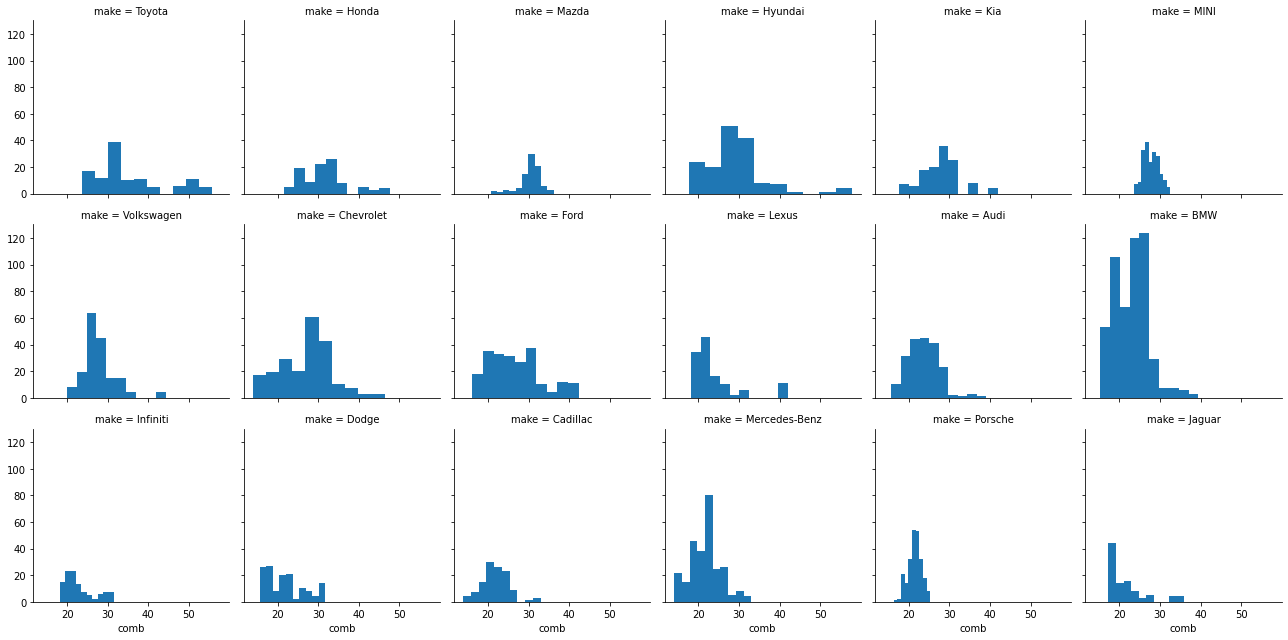

In [12]:
group_means = fuel_econ_copy[['make', 'comb']].groupby(['make']).mean()

group_order = group_means.sort_values(['comb'], ascending=False).index

g = sb.FacetGrid(data = fuel_econ_copy, col = 'make', col_wrap = 6, col_order = group_order)
g.map(plt.hist, 'comb');

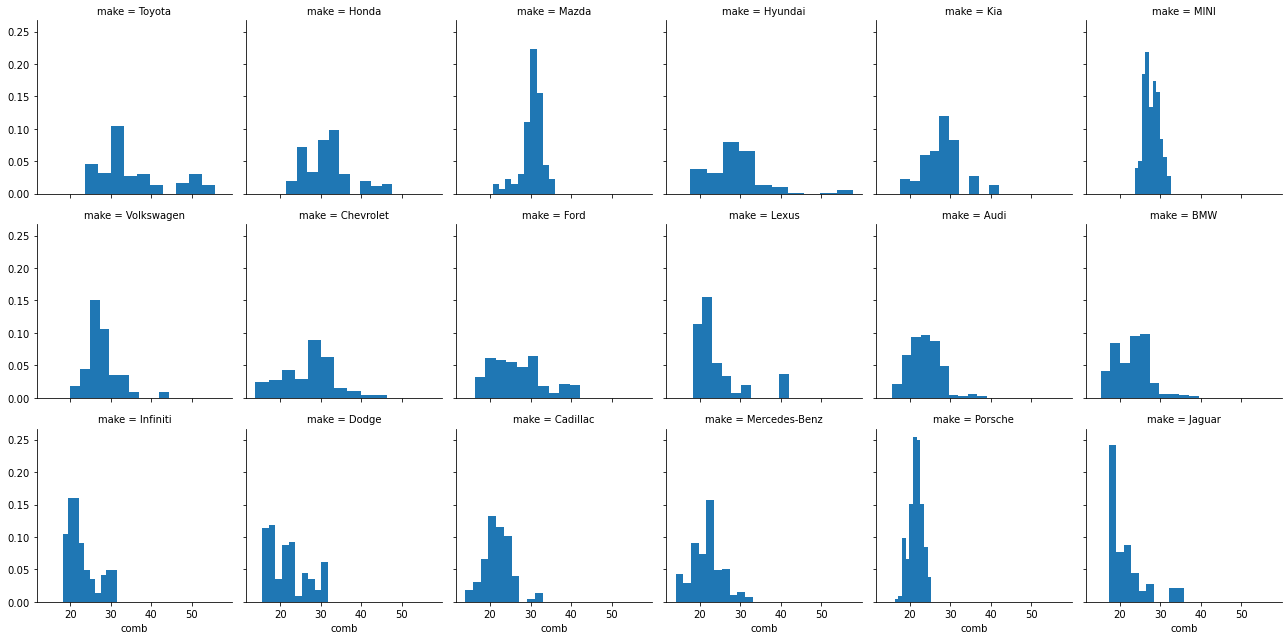

In [13]:
group_means = fuel_econ_copy[['make', 'comb']].groupby(['make']).mean()

group_order = group_means.sort_values(['comb'], ascending=False).index

g = sb.FacetGrid(data = fuel_econ_copy, col = 'make', col_wrap = 6, col_order = group_order)
g.map(plt.hist, 'comb', density=True);

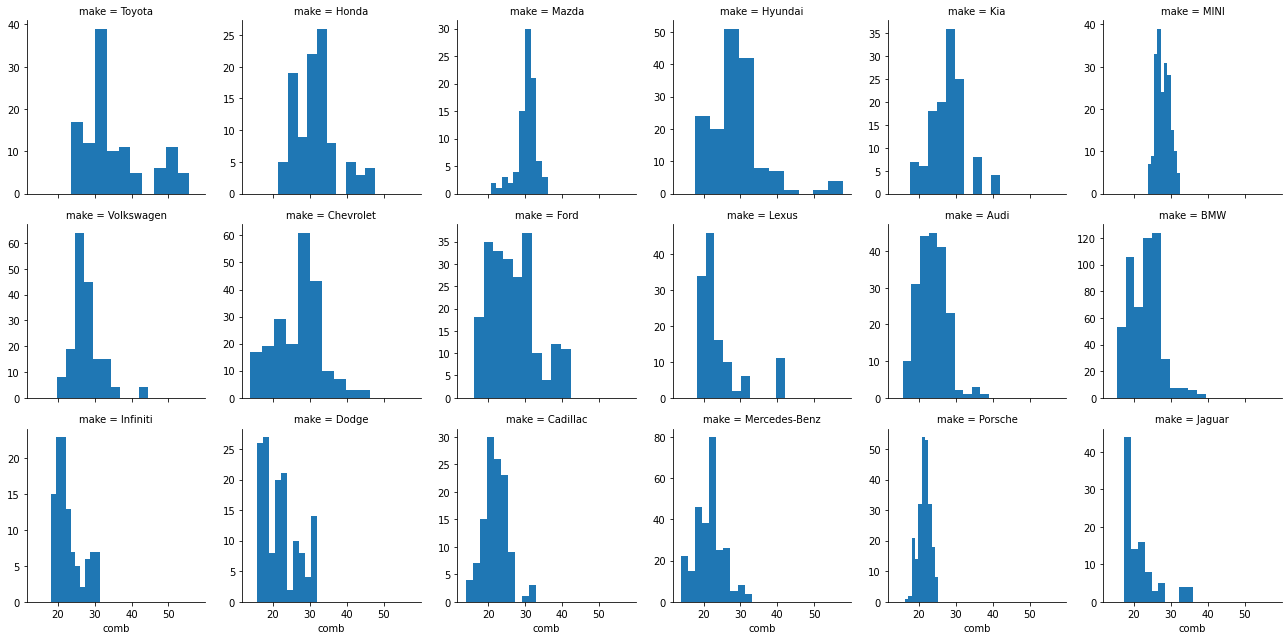

In [20]:
group_means = fuel_econ_copy[['make', 'comb']].groupby(['make']).mean()

group_order = group_means.sort_values(['comb'], ascending=False).index

g = sb.FacetGrid(data = fuel_econ_copy, col = 'make', col_wrap = 6, col_order = group_order, sharey=False)
g.map(plt.hist, 'comb');

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

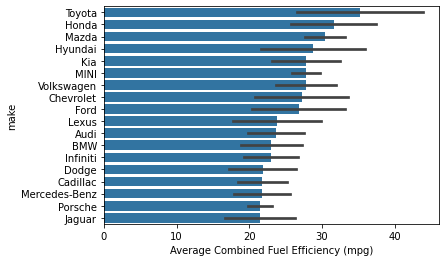

In [21]:
base_color = sb.color_palette()[0]

group_means = fuel_econ_copy[['make', 'comb']].groupby(['make']).mean()

group_order = group_means.sort_values(['comb'], ascending=False).index

sb.barplot(data=fuel_econ_copy, x='comb', y='make', color=base_color, ci='sd', order = group_order)
plt.xlabel('Average Combined Fuel Efficiency (mpg)');